# STATISTICS for DATA SCIENCE

"Without a grounding in statistics, a "data scientist" is a "data lab assistant"."

# Sampling Theory

Better data; not more data!

**Sample:** A set of observations drawn from a population, it should represent the population well.

**Population:** Target group.

**Sampling distribution:** A probability distribution of a statistics obtained through a large number of samples drawn from a specific population.

**Central limit theorem:** A statistical theory which states that when a sufficiently large sample size is given from a population with a finite level of variance; the mean of all samples from the same population will be approximately equal to the mean of the population.

## Sample

* Crate a random population of 10000:

In [1]:
import numpy as np

In [2]:
np.random.seed(10)
mypopulation = np.random.randint(0,80, 10000)

In [3]:
mypopulation[1:10]

array([15, 64, 28, 29,  8, 73,  0, 40, 36])

* Choose a sample from that population:

In [4]:
np.random.seed(10)
mysample = np.random.choice(a = mypopulation, size = 100)
mysample[1:10]

array([49, 20, 51, 47, 70, 51, 59, 49, 66])

In [5]:
mysample.mean()

38.72

In [6]:
mypopulation.mean()

39.1523

In [7]:
np.random.seed(10)
sample1 = np.random.choice(a = mypopulation, size = 100)
sample2 = np.random.choice(a = mypopulation, size = 100)
sample3 = np.random.choice(a = mypopulation, size = 100)
sample4 = np.random.choice(a = mypopulation, size = 100)
sample5 = np.random.choice(a = mypopulation, size = 100)
sample6 = np.random.choice(a = mypopulation, size = 100)
sample7 = np.random.choice(a = mypopulation, size = 100)
sample8 = np.random.choice(a = mypopulation, size = 100)
sample9 = np.random.choice(a = mypopulation, size = 100)
sample10 = np.random.choice(a = mypopulation, size = 100)

In [8]:
(sample1.mean() + sample2.mean() + sample3.mean() + sample4.mean() + sample5.mean() 
+ sample6.mean() + sample7.mean() + sample8.mean() + sample9.mean() + sample10.mean() )  / 10

39.735

In [9]:
mypopulation.mean()

39.1523

## Variance, Covariance and Correlation

**Standard deviation:** A statistics that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance.

**Variance (σ2):** A measurement of the spread between numbers in a data set. It measures how far each number in the set is from the mean and is calculated by getting the difference between each number in the set and the mean, squaring the differences (to make them positive) and dividing the sum of the squares by the number of values in the set.

**Covariance:** A measure of the joint variability for relation of two random variables.

**Correlation:** A single number that describes the degree of relationship between two variables.

## Confidence Intervals

**Confidence interval:** A range of values we are fairly sure our true value lies in.

**Step 1:** n = 100, mean = 180, standard dev = 40

**Step2:** Decide confidence interval: 95 or 99?
Estimate Z table value (1.96 - 2.57)

**Step3:** Calculate confidence interval:  
![](img.jpg)

**Result:** 180 +- 8.84 means between 172 and 188

In [10]:
import numpy as np

np.random.seed(10)
mypopulation = np.random.randint(0, 80, 10000)

np.random.seed(10)
mysample = np.random.choice(a = mypopulation, size = 100)

In [11]:
mysample.mean()

38.72

* Estimate the confidence interval for mysample:

In [12]:
import scipy.stats as st

In [13]:
st.t.interval(alpha = 0.95, 
              df = len(mysample) - 1, 
              loc = np.mean(mysample), 
              scale = st.sem(mysample))

(34.21439518785442, 43.225604812145576)

In [14]:
mypopulation.mean()

39.1523

* Another estimation of confidence interval:

In [15]:
import statsmodels.stats.api as sms
sms.DescrStatsW(mysample).tconfint_mean()

(34.21439518785442, 43.225604812145576)

# Introduction to Probability

More random machine learning algorithms are more successful!

**Probability:** The likelihood of something happening.

**Random variables:** A variable whose value is unknown or a function that assigns values to each of an experiment's outcomes.

**Distribution:** Numerical representation of cases.

**Probability distribution:** A table or an equation that links each outcome of a statistical experiment with its probability of occurrence.


**Discrete probability distributions:**

- Bernoulli
- Binom
- Poisson


**Continuous probability distributions:**

- Normal distribution
- Uniform distribution
- Exponential distribution

## Bernoulli Distribution

Binary experiments like successful-unsuccessful, positive-negative -> discrete probability distribution

![](img2.jpg)

### Representation of Bernoulli distribution

In [16]:
from scipy.stats import bernoulli

In [17]:
data_ber = bernoulli.rvs(size = 10000, p = 0.5)

In [18]:
data_ber[0:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [19]:
import seaborn as sns

ax = sns.distplot(data_ber,
                 kde = False,
                 color = "orange",
                 hist_kws={"linewidth": 15, "alpha" : 1});

ax.set(xlabel = "bernoulli", ylabel = "frequency");

### Probability estimation on a dataset

In [20]:
rng = np.random.RandomState(123)
head_tail = rng.randint(0,2, size = 1000)
head_tail[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [21]:
tails = np.sum(head_tail)

In [22]:
head_tail.shape[0]

1000

In [23]:
heads = head_tail.shape[0] - tails

In [24]:
tails

520

In [25]:
heads

480

In [26]:
520/(520 + 480)

0.52

### Law of large numbers

A theorem that describes the result of performing the same experiment a large number of times. According to the law, the mean of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

In [27]:
rng = np.random.RandomState(123)

for i in [1,2,3,4,5,6,7]:
    exp_count = 10**i
    heads_tails = rng.randint(0, 2, size = exp_count)
    tail_probability = np.mean(heads_tails)
    print('Probability for tail: %.2f' % (tail_probability * 100))
    

Probability for tail: 30.00
Probability for tail: 48.00
Probability for tail: 53.60
Probability for tail: 49.53
Probability for tail: 49.80
Probability for tail: 50.03
Probability for tail: 50.03


## Binom Distribution

n trials and k times success

![](imgbinom.jpg)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binom distribution')]

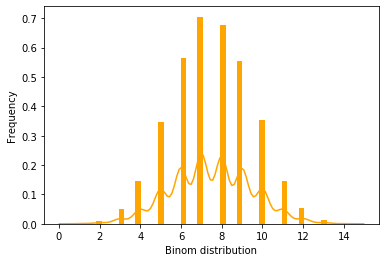

In [28]:
from scipy.stats import binom

data_binom = binom.rvs(n = 15, p = 0.5, size = 10000)

ax = sns.distplot(data_binom,
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel = 'Binom distribution', ylabel = 'Frequency')


* Probability mass function:

In [29]:
import scipy.stats as stats
from matplotlib.pyplot import plot

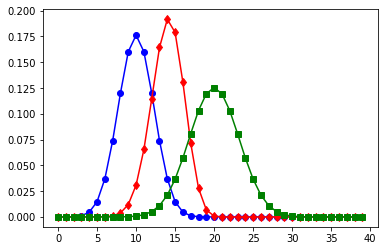

In [30]:
bd1 = stats.binom(20, 0.5)
bd2 = stats.binom(20, 0.7)
bd3 = stats.binom(40, 0.5)

k = np.arange(40)

plot(k, bd1.pmf(k), 'o-b')
plot(k, bd2.pmf(k), 'd-r')
plot(k, bd3.pmf(k), 's-g')

In [31]:
p = 0.5
n = 20
rv = stats.binom(n,p)

In [32]:
rv.pmf(10)

0.17619705200195293

## Poisson Distribution

Used to calculate the probability of discrete random variables - for the probability of cases that are rarely encountered in a particular time period and particular field.

![](imgpoisson.jpg)


For a rare occasion:

* n >= 50

* (p.n = )λ < 5

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson')]

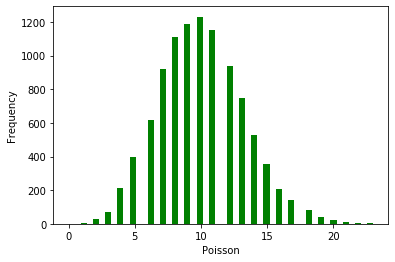

In [33]:
from scipy.stats import poisson
import scipy.stats as stats
from matplotlib.pyplot import plot

data_poisson = poisson.rvs(mu=10, size=10000)

ax = sns.distplot(data_poisson,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Poisson', ylabel='Frequency')

* Probability mass function:

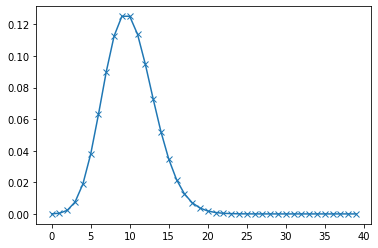

In [34]:
k = np.arange(40)
ps = stats.poisson(10)
plot(k, ps.pmf(k), 'x-')


In [35]:
n = 100
k = 5
p = 0.01

lambda_ = n*p

In [36]:
lambda_

1.0

In [37]:
rv = stats.poisson(mu = lambda_)
rv.pmf(k)

0.00306566200976202

mu = expected value

## Normal Distribution

Used for probability estimation of normally distributed random continuous variables.


![](imgnormal.jpg)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

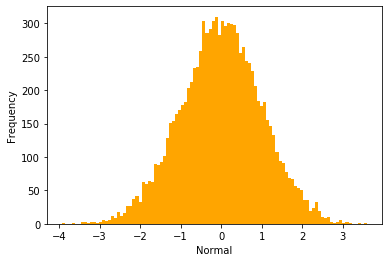

In [38]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=False,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal', ylabel='Frequency')

* Probability density function:

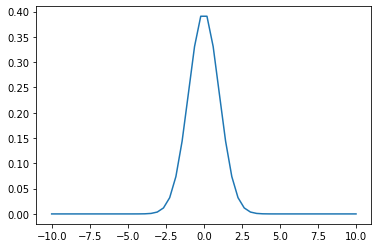

In [39]:
k = np.linspace(-10,10)
pd = stats.norm(0,1)
plot(k, pd.pdf(k))

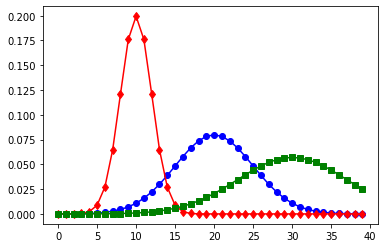

In [40]:
nm1 = stats.norm(20,5)
nm2 = stats.norm(10, 2)
nm3 = stats.norm(30, 7)
k = np.arange(40)
plot(k, nm1.pdf(k), 'o-b')
plot(k, nm2.pdf(k), 'd-r')
plot(k, nm3.pdf(k), 's-g')

In [41]:
rv = stats.norm(10,2)
rv.pdf(10)

0.19947114020071635